# Recurrent Neural Networks

# 1)-Import key modules

In [1]:
import numpy as np
import pandas as pd
import math
import os

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import LSTM, SimpleRNN, Dropout

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# 2)- Loading data

In [2]:
dataset = pd.read_csv('international-airline-passengers.csv',skipfooter=5)

C:\Users\69785hsh\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
dataset.head()

,Month,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# 3)- Exploring data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
Month         139 non-null object
passengers    139 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
dataset.describe()

,passengers
count,139.000000
mean,273.136691
std,115.007385
min,104.000000
25%,179.000000
50%,259.000000
75%,355.000000
max,622.000000


In [6]:
# assign to just passenger number to this new smaller data.
data = dataset.iloc[:,1].values

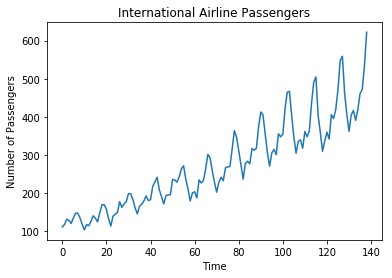

In [7]:
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.title("International Airline Passengers")
plt.show()

In [8]:
data.shape

(139,)

In [9]:
# As you can see; shape of data is (142,). We should reshape it.
data =data.reshape(-1,1)
data.astype("float32")
data.shape

(139, 1)

In [10]:
# After reshaping, we should scale all of datas between 0 and 1.
from sklearn.preprocessing import MinMaxScaler #import scling library
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

C:\Users\69785hsh\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
data_scaled[:5]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]])

In [12]:
train_data_size = int(len(data_scaled)*0.50)
test_data_size = len(data_scaled) - train_data_size
print("Train data size is {}".format(train_data_size))
print("Test data size is {}".format(test_data_size))

Train data size is 69
Test data size is 70


In [13]:
train = data_scaled[0:train_data_size,:]
test = data_scaled[train_data_size:len(data_scaled),:]
# Let's check number of train and test datas again
print("Train data size is {}".format(len(train)))
print("Test data size is {}".format(len(test)))

Train data size is 69
Test data size is 70


In [14]:
x_train = []
y_train = []
time_steps=10
for i in range(len(train)-time_steps-1):
    a = train[i:(i+time_steps),0]
    x_train.append(a)
    y_train.append(train[i + time_steps,0])
trainX = np.array(x_train)
trainY = np.array(y_train)

In [15]:
trainX.shape

(58, 10)

In [16]:
x_test = []
y_test = []
for i in range(len(test)-time_steps-1):
    a = test[i:(i+time_steps),0]
    x_test.append(a)
    y_test.append(test[i + time_steps,0])
testX = np.array(x_test)
testY = np.array(y_test)

In [17]:
testX.shape

(59, 10)

In [18]:
# Let's reshape trainX and testX
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1],1))
# Print and check shapes
print("Shape of trainX is {}".format(trainX.shape))
print("Shape of testX is {}".format(testX.shape))

Shape of trainX is (58, 10, 1)
Shape of testX is (59, 10, 1)


# RNN model

In [19]:
from keras.layers import Dense, SimpleRNN, Dropout
from keras.metrics import mean_squared_error
from keras.models import Sequential

### Initializing RNN

In [20]:
model = Sequential()
# Add the first layer and Dropout regularization
model.add(SimpleRNN(units=100,activation='tanh',return_sequences=True, 
                    input_shape=(trainX.shape[1],1)))
model.add(Dropout(0.20))
# Second layer and Dropout regularization
model.add(SimpleRNN(units = 100, activation='tanh',return_sequences=True))
model.add(Dropout(0.20))
# Third layer and Dropout regularization
model.add(SimpleRNN(units = 70, activation='tanh', return_sequences= True))
model.add(Dropout(0.20))
# Fourth layer and Dropout regularization
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.20))
# Add final or output layer
model.add(Dense(units=1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
# Compile our RNN model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10, 100)           10200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 10, 100)           20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 10, 70)            11970     
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 70)            0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 50)                6050      
__________

### Fitting the RNN to the training set

In [23]:
model.fit(trainX, trainY, epochs = 200, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
58/58 [==============================] - 1s 10ms/step - loss: 1.0969
Epoch 2/200
58/58 [==============================] - 0s 207us/step - loss: 0.5057
Epoch 3/200
58/58 [==============================] - 0s 286us/step - loss: 0.4486
Epoch 4/200
58/58 [==============================] - 0s 398us/step - loss: 0.4432
Epoch 5/200
58/58 [==============================] - 0s 296us/step - loss: 0.2361
Epoch 6/200
58/58 [==============================] - 0s 325us/step - loss: 0.3004
Epoch 7/200
58/58 [==============================] - 0s 360us/step - loss: 0.2088
Epoch 8/200
58/58 [==============================] - 0s 405us/step - loss: 0.1640
Epoch 9/200
58/58 [==============================] - 0s 390us/step - loss: 0.2197
Epoch 10/200
58/58 [==============================] - 0s 274us/step - loss: 0.1777
Epoch 11/200
58/58 [==============================] - 0s 230us/step - loss: 0.1824
Epoch 12/200
58/58 [=============================

58/58 [==============================] - 0s 277us/step - loss: 0.0115
Epoch 97/200
58/58 [==============================] - 0s 277us/step - loss: 0.0151
Epoch 98/200
58/58 [==============================] - 0s 259us/step - loss: 0.0148
Epoch 99/200
58/58 [==============================] - 0s 259us/step - loss: 0.0111
Epoch 100/200
58/58 [==============================] - 0s 277us/step - loss: 0.0087
Epoch 101/200
58/58 [==============================] - 0s 277us/step - loss: 0.0138
Epoch 102/200
58/58 [==============================] - 0s 277us/step - loss: 0.0077
Epoch 103/200
58/58 [==============================] - 0s 294us/step - loss: 0.0098
Epoch 104/200
58/58 [==============================] - 0s 363us/step - loss: 0.0117
Epoch 105/200
58/58 [==============================] - 0s 253us/step - loss: 0.0106
Epoch 106/200
58/58 [==============================] - 0s 276us/step - loss: 0.0133
Epoch 107/200
58/58 [==============================] - 0s 276us/step - loss: 0.0154
Epoch 108

58/58 [==============================] - 0s 395us/step - loss: 0.0086
Epoch 194/200
58/58 [==============================] - 0s 294us/step - loss: 0.0070
Epoch 195/200
58/58 [==============================] - 0s 269us/step - loss: 0.0066
Epoch 196/200
58/58 [==============================] - 0s 276us/step - loss: 0.0067
Epoch 197/200
58/58 [==============================] - 0s 276us/step - loss: 0.0083
Epoch 198/200
58/58 [==============================] - 0s 276us/step - loss: 0.0083
Epoch 199/200
58/58 [==============================] - 0s 307us/step - loss: 0.0088
Epoch 200/200
58/58 [==============================] - 0s 259us/step - loss: 0.0089


### Prediction

In [24]:
trainPrediction = model.predict(trainX)
testPrediction = model.predict(testX)

In [25]:
trainPrediction = scaler.inverse_transform(trainPrediction)
trainY = scaler.inverse_transform([trainY])
testPrediction = scaler.inverse_transform(testPrediction)
testY = scaler.inverse_transform([testY])

In [26]:
# Convert tensor to numpy. Otherwise we could not sqrt values.
import tensorflow as tf
sess = tf.Session()
with sess.as_default():
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPrediction[:,0]).eval())
    testScore = math.sqrt(mean_squared_error(testY[0], testPrediction[:,0]).eval())
print("Train Score is %.2lf RMSE"%(trainScore))
print("Test Score is %.2lf RMSE"%(testScore))

Train Score is 21.14 RMSE
Test Score is 51.33 RMSE


### Results

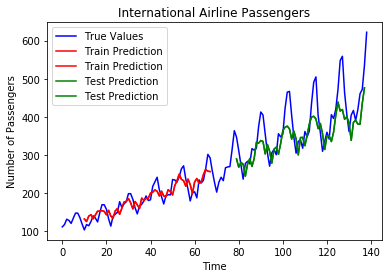

In [27]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPrediction)+time_steps, :] = trainPrediction

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPrediction)+(time_steps*2)+1:len(dataset)-1, :] = testPrediction

plt.plot(scaler.inverse_transform(data_scaled),label = 'True Values', color='blue')
plt.plot(trainPredictPlot,label='Train Prediction', color='red')
plt.plot(testPredictPlot,label = 'Test Prediction', color='green')
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.title("International Airline Passengers")
plt.legend()
plt.show()